In [1]:
import os

go_up_n_directories = lambda path, n: os.path.abspath(
    os.path.join(*([os.path.dirname(path)] + [".."] * n))
)
os.chdir(go_up_n_directories(os.getcwd(), 0))  # run once (otherwise restart kernel)

In [2]:
import pandas as pd
import numpy as np
import json
import utilities.visualization_utils as visualization_utils
import matplotlib.pyplot as plt

### Experiment 1: HP tuning 

In [3]:
# Load data for experiment 1
with open("visualizations/data/exp1_results.json") as json_file:
    exp1_results = json.load(json_file)

EFG

In [4]:
def not_monotonic_list(lst: list[int]) -> list[int]:
    lst = sorted(lst)
    start = lst[0]
    checklist = range(start, len(lst) + 1, 1)
    is_monotonic = []
    for i, check in enumerate(checklist):
        if lst[i] == check:
            continue
        else:
            is_monotonic.append(i)
    return is_monotonic

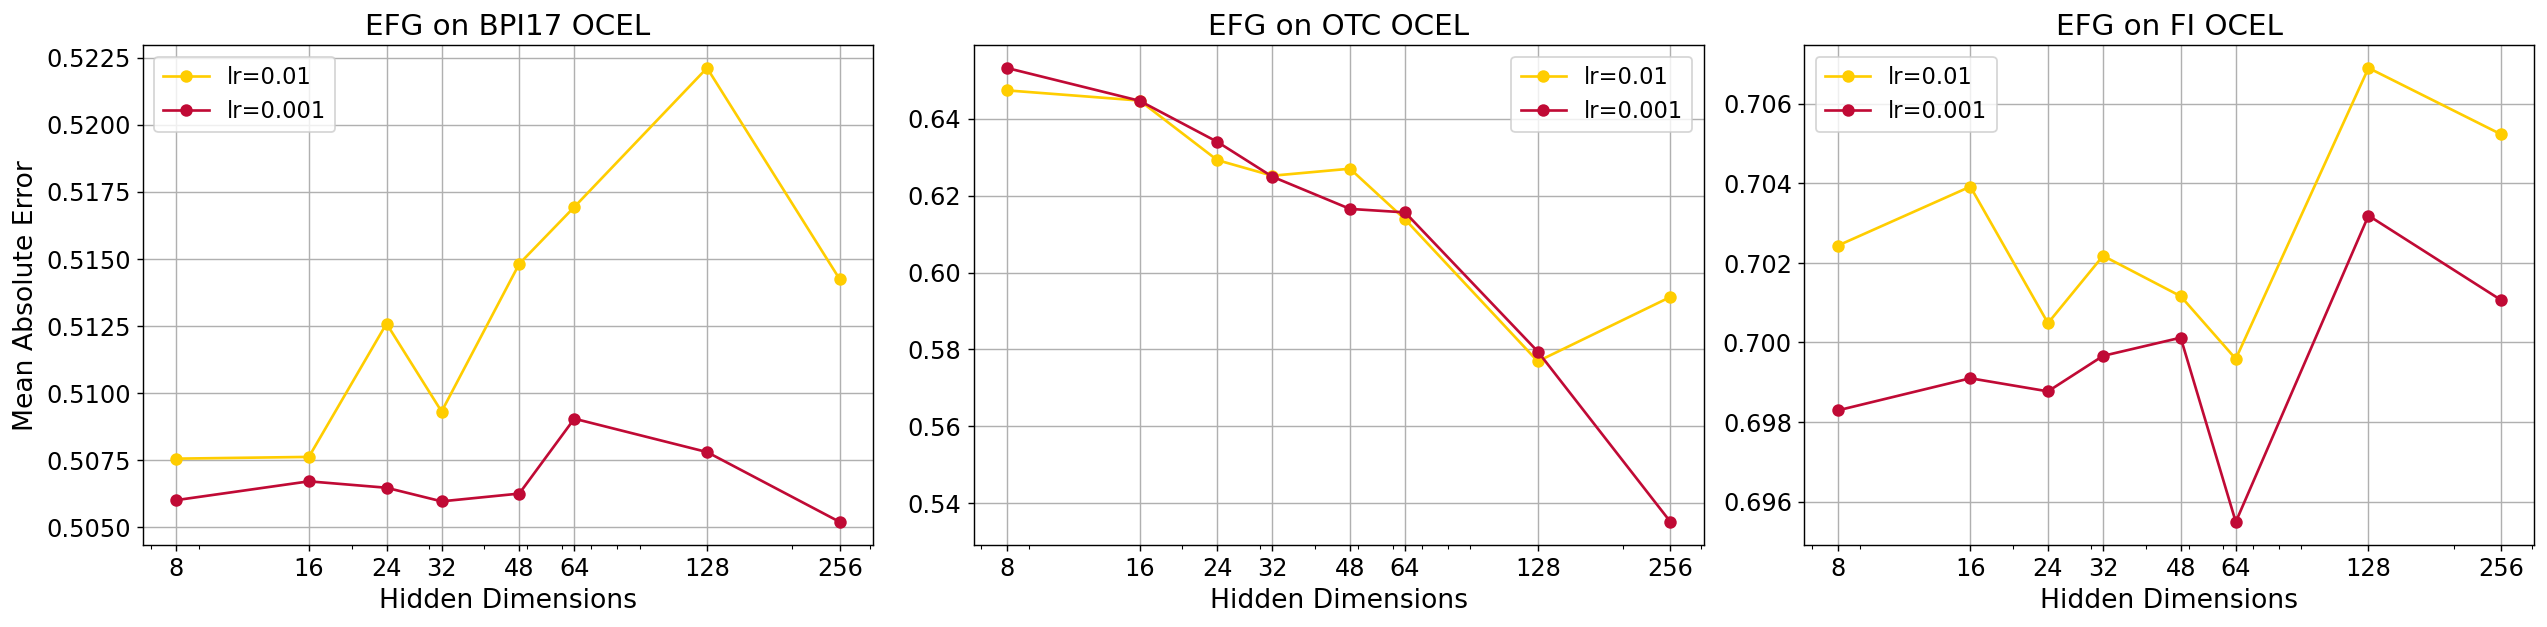

In [5]:
visualization_utils.create_exp1_encoding_plot(
    "efg", exp1_results, fontsize=15, save=True
)

HOEG

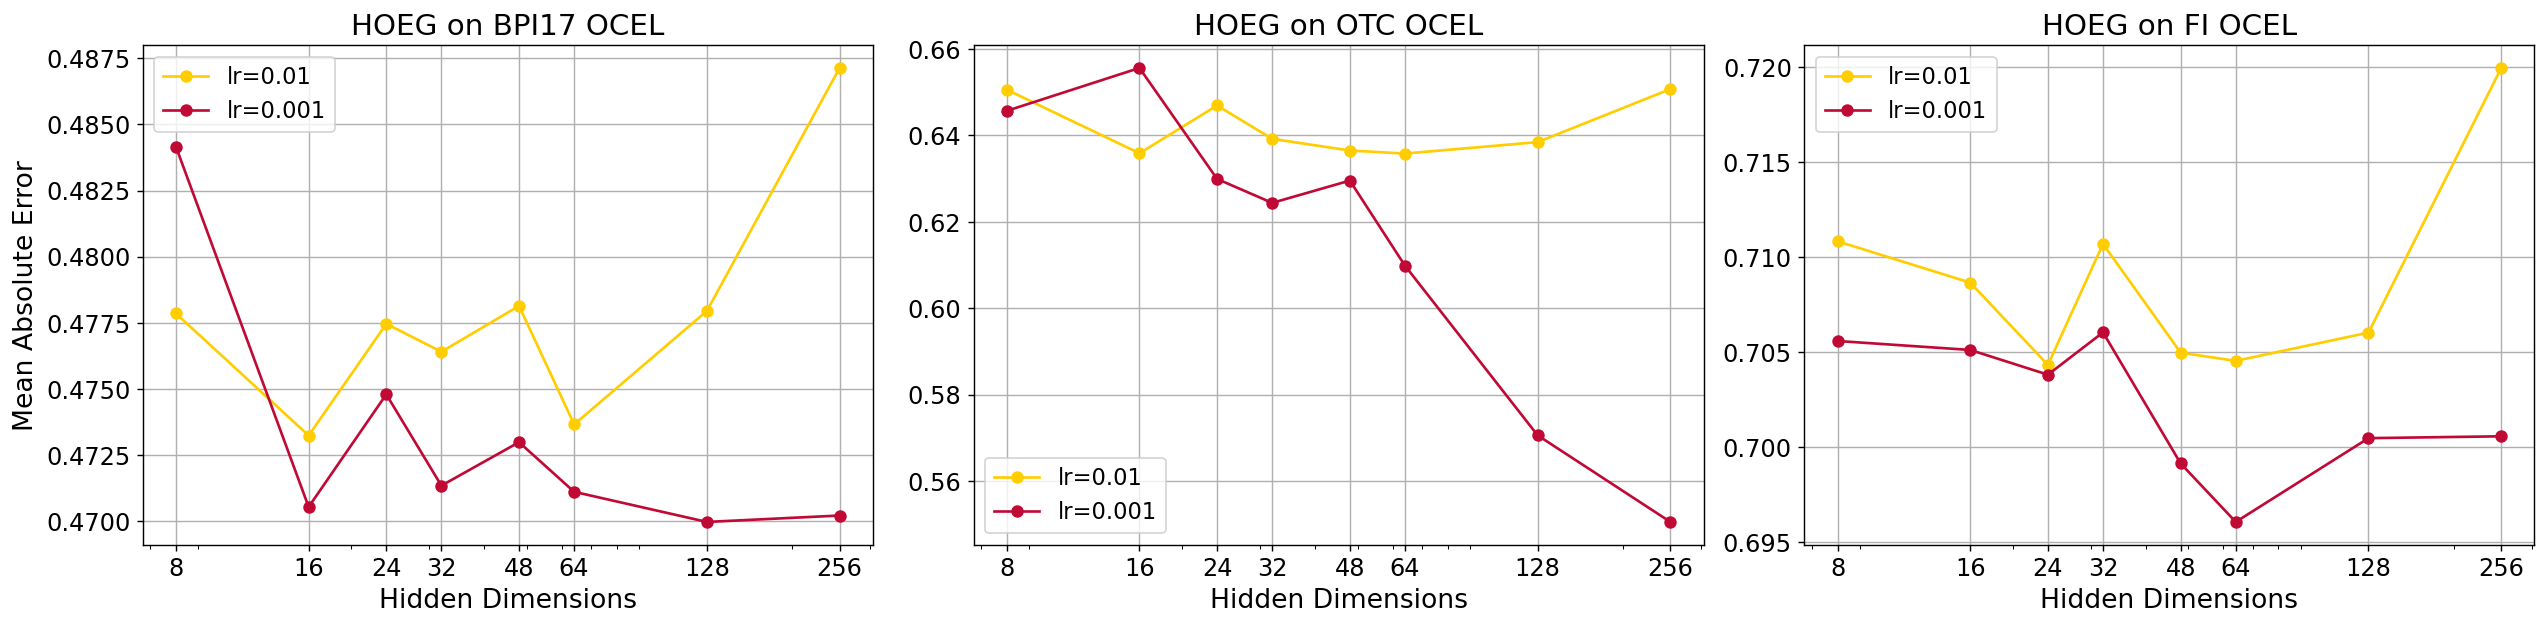

In [6]:
visualization_utils.create_exp1_encoding_plot("hoeg", exp1_results,fontsize=15, save=True)

### Experiment 2: Encoding Type

In [7]:
# Load data for experiment 2
with open("visualizations/data/exp2_results.json") as json_file:
    exp2_results = json.load(json_file)

#### Encoding Performance

BPI17

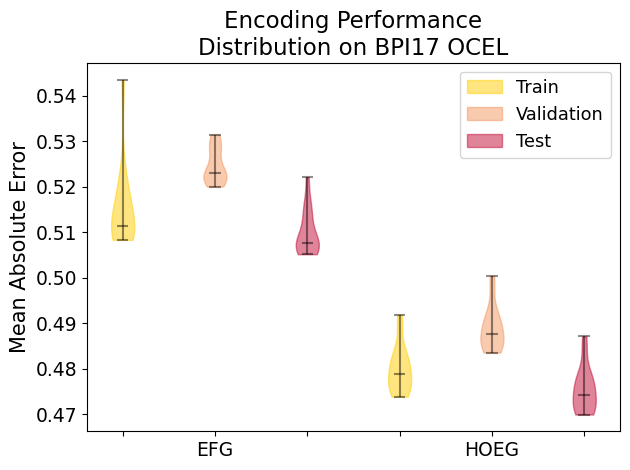

In [14]:
visualization_utils.create_exp2a_plot(
    encoding_performances=exp2_results["Encoding Performance"],
    dataset="BPI17",
    encoding_types=["efg", "hoeg"],
    fontsize=15,
    save=True,
)


OTC

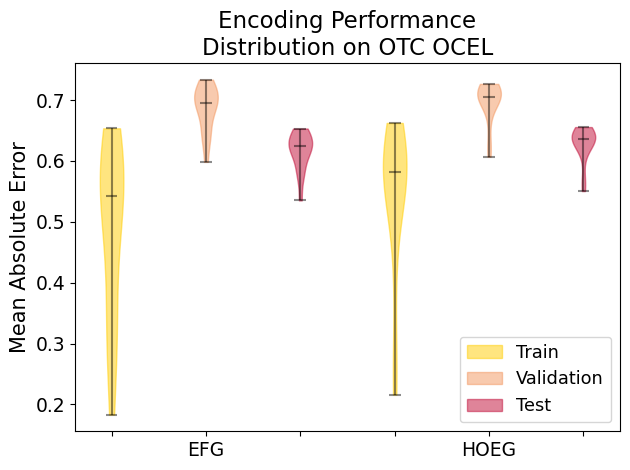

In [9]:
visualization_utils.create_exp2a_plot(
    encoding_performances=exp2_results["Encoding Performance"],
    dataset="OTC",
    encoding_types=["efg", "hoeg"],
    fontsize=15,
    legend_location='lower right',
    save=True,
)

Financial Institution

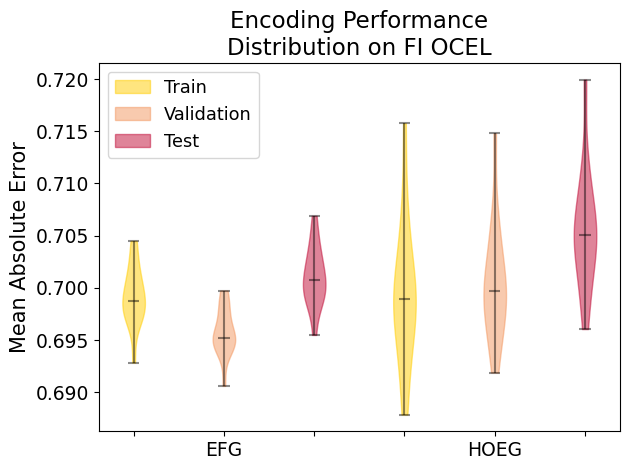

In [10]:
visualization_utils.create_exp2a_plot(
    exp2_results["Encoding Performance"],
    "Financial Institution",
    ["efg", "hoeg"],
    legend_location='upper left',
    save=True,
)

#### Learning Curve

BPI17

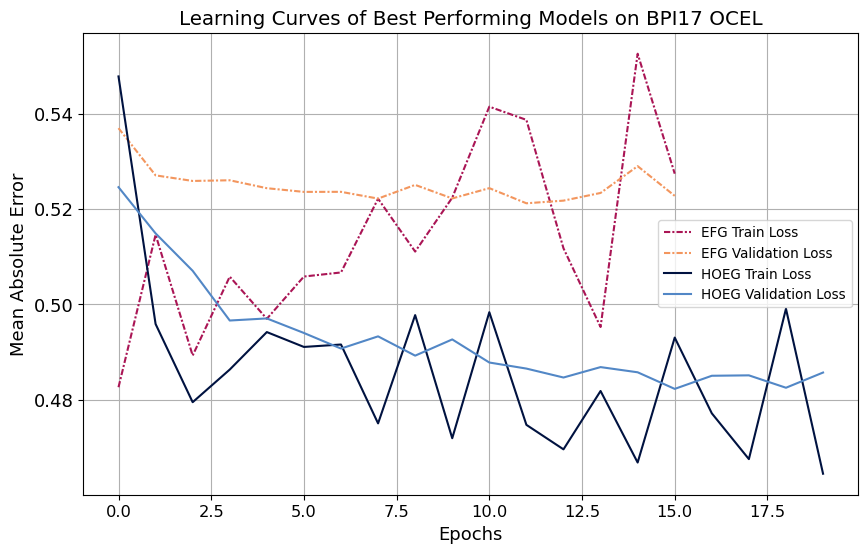

In [11]:
visualization_utils.get_exp2b_plot(
    "BPI17",
    encoding_colors={
        "efg": (visualization_utils.BURGUNDY, visualization_utils.ORANGE),
        "hoeg": (visualization_utils.DARKBLUE, visualization_utils.BLUE),
    },
    data_base_path="visualizations/data/learning_curves",
    figsize=(10, 6),
    fontsize=13,
    save=True,
)

OTC

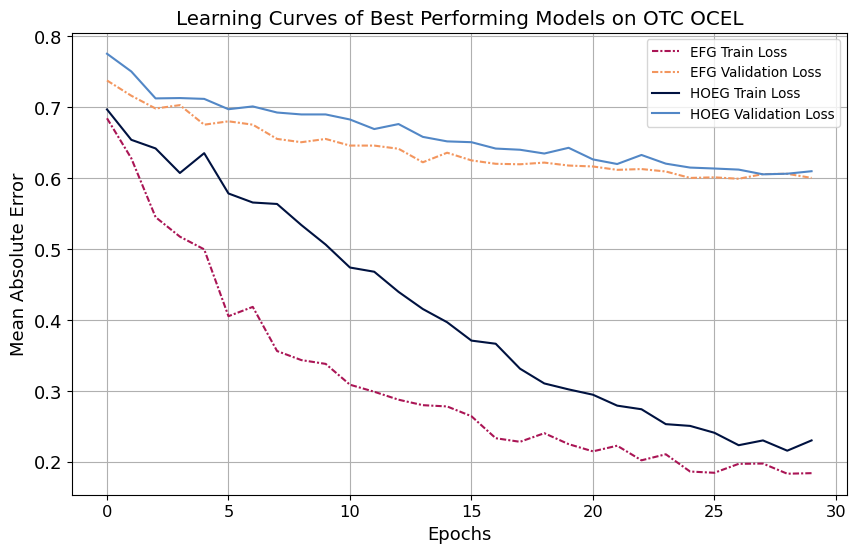

In [12]:
visualization_utils.get_exp2b_plot(
    "OTC",
    encoding_colors={
        "efg": (visualization_utils.BURGUNDY, visualization_utils.ORANGE),
        "hoeg": (visualization_utils.DARKBLUE, visualization_utils.BLUE),
    },
    data_base_path="visualizations/data/learning_curves",
    figsize=(10, 6),
    fontsize=13,
    save=True,
)

Financial Institution

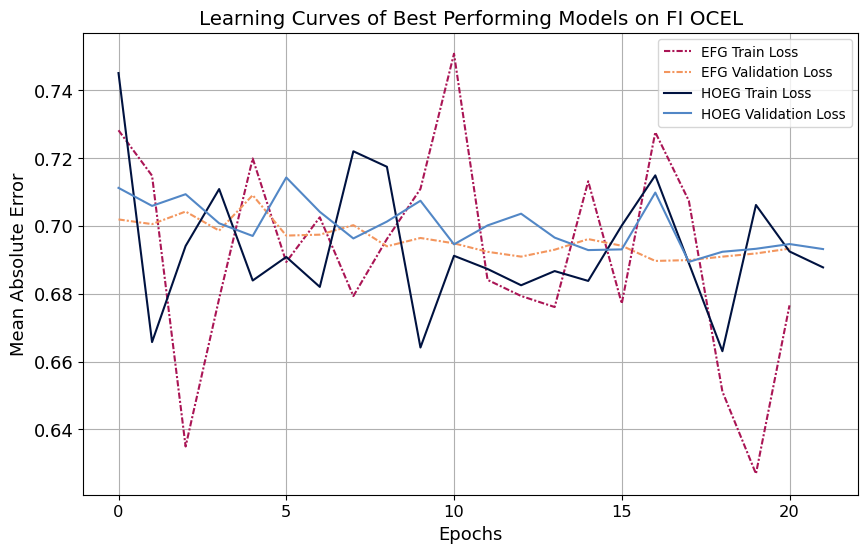

In [13]:
visualization_utils.get_exp2b_plot(
    "Financial Institution",
    encoding_colors={
        "efg": (visualization_utils.BURGUNDY, visualization_utils.ORANGE),
        "hoeg": (visualization_utils.DARKBLUE, visualization_utils.BLUE),
    },
    data_base_path="visualizations/data/learning_curves",
    figsize=(10, 6),
    fontsize=13,
    save=True,
)

### Experiment 3: Baseline

We create extensive tables, one per dataset.